In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from getdist import plots, MCSamples

In [2]:
cov = np.load("/cluster/work/refregier/alexree/local_packages/train_pybird_emulators/src/train_pybird_emulators/data/lhc_pk_bank/gaussian_bank/covariance_from_henry.npy")

In [3]:
plt.imshow(cov)
plt.colorbar()

In [4]:
paramnames = ["ln10^{10}A_s", "n_s", "h", "omega_m","omega_b", "m_ncdm","Omega_k","N_ur", ]


In [5]:
index_mnu = paramnames.index("m_ncdm")

In [6]:
cov[index_mnu, index_mnu]

0.3498601280470418

In [7]:
# lets remvoe the log m_nu and add a 1d part for this guy 

In [8]:
# cov_new = cov 

In [9]:
# cov_new[3,:] = 0.
# cov_new[:,3] = 0.

In [10]:
%matplotlib inline
plt.imshow(cov)
plt.colorbar()

In [11]:
# cov_new[3,3]=0.2 # a bit random but less guess this is LSS_sigma as before 

In [12]:
# plt.imshow(cov_new)
# plt.colorbar()

In [13]:
# np.save("/cluster/work/refregier/alexree/local_packages/train_pybird_emulators/src/train_pybird_emulators/data/lhc_pk_bank/gaussian_bank/cov_normal_mu.npy", cov_new)

In [14]:
planck_mean = {'omega_b': 0.02235, 'omega_m': 0.315, 'h': 0.675, 'ln10^{10}A_s': 3.044, 'n_s': 0.965, 'Omega_k': 0., 'N_ncdm': 1., 'm_ncdm': 0.02, 'N_ur':0.00641, 'w0_fld': -1, 'Omega_Lambda': 0.}


Removed no burn in


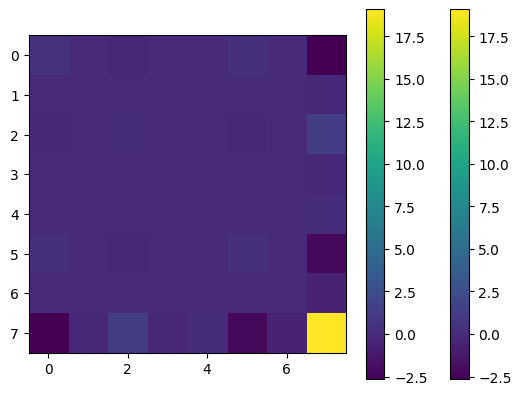

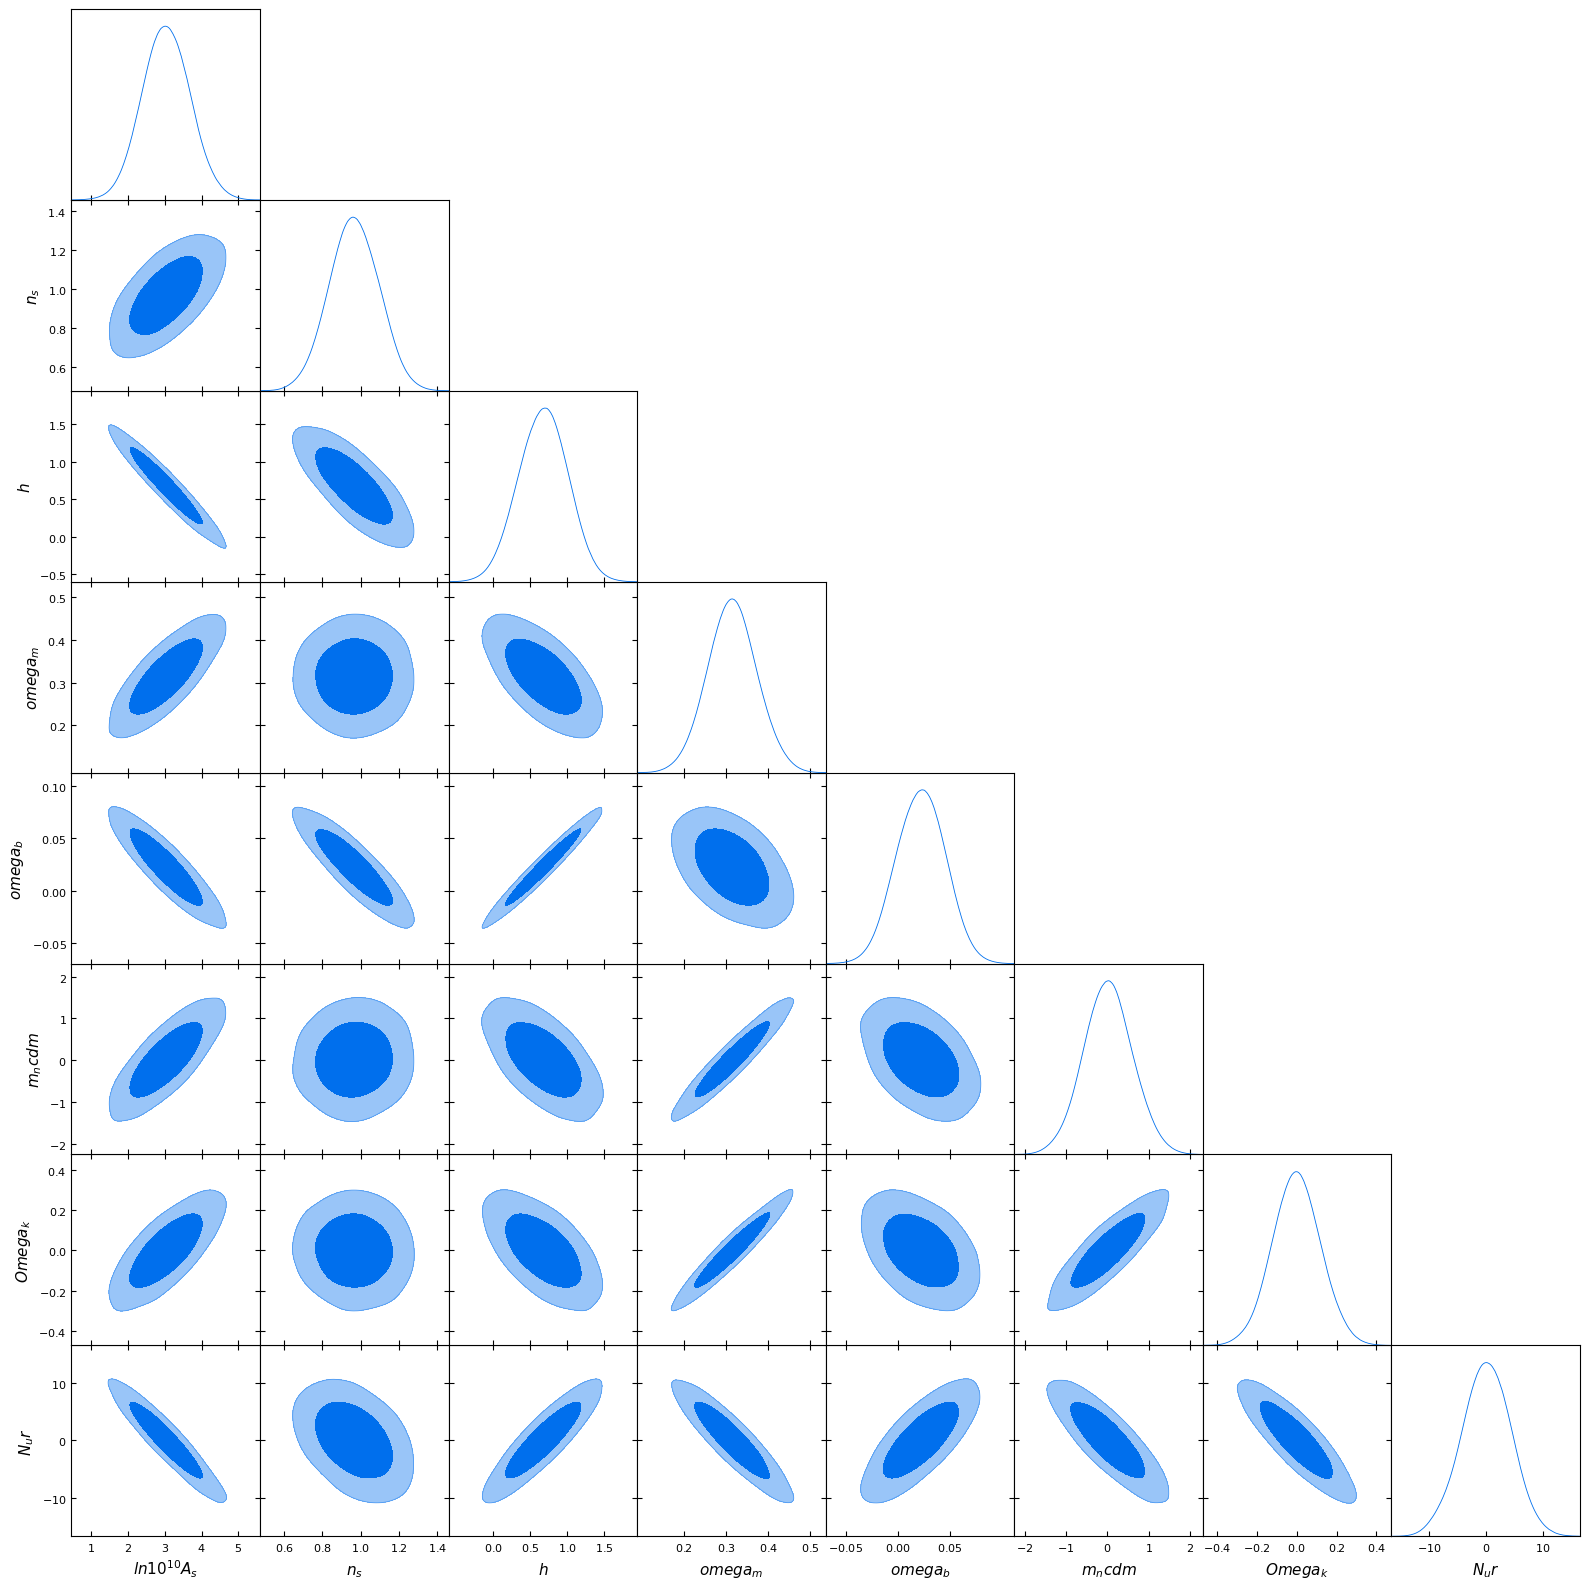

In [15]:
%matplotlib inline 
# Create an ordered mean vector based on paramnames
mean_vector = [planck_mean[param] for param in paramnames]

# Number of samples to draw
num_samples = 10000

# Draw random samples from the Gaussian distribution
samples = np.random.multivariate_normal(mean=mean_vector, cov=cov, size=num_samples)

# Create a GetDist MCSamples object
gdsamples = MCSamples(samples=samples, names=paramnames, labels=paramnames)

# Create the triangle plot
g = plots.get_subplot_plotter()
g.triangle_plot([gdsamples], filled=True, truth=planck_mean)

In [16]:
# np.save("/cluster/work/refregier/alexree/local_packages/train_pybird_emulators/src/train_pybird_emulators/data/lhc_pk_bank/gaussian_bank/cov_new.npy", cov)

In [17]:
# find the limits for the validation plot 

In [20]:
# Identify where the parameter is +/- 1 sigma from the mean
std_devs = np.sqrt(np.diag(cov))
outliers = []
for i, param in enumerate(paramnames):
    mean = mean_vector[i]
    lower_bound = mean - 4 * std_devs[i]
    upper_bound = mean + 4 * std_devs[i]
    
    # if np.any((samples[:, i] < lower_bound) | (samples[:, i] > upper_bound)):
    outliers.append((param, lower_bound, upper_bound, mean))

# Print the results in a formatted manner
print("Parameters outside +/- 4 sigma range from the mean:")
for param, lower, upper, mean in outliers:
    print(f"Parameter: {param}\n  Mean: {mean:.3f}\n  +/- 4 Sigma Range: ({lower:.3f}, {upper:.3f})\n")

Parameters outside +/- 4 sigma range from the mean:
Parameter: ln10^{10}A_s
  Mean: 3.044
  +/- 4 Sigma Range: (0.451, 5.637)

Parameter: n_s
  Mean: 0.965
  +/- 4 Sigma Range: (0.444, 1.486)

Parameter: h
  Mean: 0.675
  +/- 4 Sigma Range: (-0.654, 2.004)

Parameter: omega_m
  Mean: 0.315
  +/- 4 Sigma Range: (0.082, 0.548)

Parameter: omega_b
  Mean: 0.022
  +/- 4 Sigma Range: (-0.072, 0.117)

Parameter: m_ncdm
  Mean: 0.020
  +/- 4 Sigma Range: (-2.346, 2.386)

Parameter: Omega_k
  Mean: 0.000
  +/- 4 Sigma Range: (-0.485, 0.485)

Parameter: N_ur
  Mean: 0.006
  +/- 4 Sigma Range: (-17.470, 17.483)

